# __astroLuSt__

A collection of functions useful for dataanlysis especially in astronomy.

## __Files__

The different parts of the module are saved in *./module_parts*.
The current version consists of the following parts:
- *data_astroLuSt.py*
    - classes and functions useful for data-processing
- *PHOEBE_astroLuSt.py*
    - classes and functions useful for working with PHOEBE
- *plotting_astroLuSt.py*
    - classes and functions useful for plotting
- *utility_astroLuSt.py*
    - classes and functions for random convenient stuff

Let's start by importing the module

In [1]:
import astroLuSt as al

## __Time_stuff__
Class to time the execution of tasks.

- __start_task__
    - starts timer of task
- __end_task__
    - ends timer of task
    - prints protocol

### One simple task

In [2]:
import time     #just loaded to simulate a task running

task = al.Time_stuff("some task")

#time the running-time of some task
task.start_task()
time.sleep(2)   #run some task
task.end_task()

--> Started some task at time 2021-11-04 12:16:33.749494
--> Time needed for some task: 0:00:02.002215
--> Finished some task at time 2021-11-04 12:16:35.751709


### Also intertwined tasks are possible

In [3]:
import time     #just loaded to simulate a task running

#create tasks
task = al.Time_stuff("some task")
task2 = al.Time_stuff("another task")

#time running-time of two intertwined tasks
task.start_task()
time.sleep(2)   #run some task
task2.start_task()
time.sleep(3)   #run some other task
task.end_task()
task2.end_task()


--> Started some task at time 2021-11-04 12:16:37.123306
--> Started another task at time 2021-11-04 12:16:39.125348
--> Time needed for some task: 0:00:05.003776
--> Finished some task at time 2021-11-04 12:16:42.127082
--> Time needed for another task: 0:00:03.001734
--> Finished another task at time 2021-11-04 12:16:42.127082


## __Table_LuSt__
Class to create table in the bash from a given list of rows and a header.

Start by createing a Table_LuSt object and populating with a header and two rows.

In [4]:
header = ["C1", "C2", "C3", "C4"]
separators = ["||", "|", " ", "|"]
alignments = ["l", "c", "c", "r"]
row1 = ["t11", 246, 2.45, 1E6]
row2 = ["t21", 1, 26.45, 1.2E-3]
row12 = [row1, row2]
fstring12 = 2*[["%10s", "%8d", "%8.3f", "%12.1e"]]    #formatstrings for row1 and row2
newsects = [False, "-"]

table = al.Table_LuSt(header=header,            #header
                      rows=row12,               #rows (content of table)
                      formatstrings=fstring12,  #formatting of rows
                      separators=separators,    #separators to use between columns
                      newsections=newsects,     #when to start new sections
                      alignments=alignments     #how to align the contents
                      )
# table.header = header   #use to change/set a header

print(table)            #prints out table objects and its attributes


Table_LuSt(
header = ['C1', 'C2', 'C3', 'C4'],
rows = [['t11', 246, 2.45, 1000000.0], ['t21', 1, 26.45, 0.0012]],
formatstrings = [['%10s', '%8d', '%8.3f', '%12.1e'], ['%10s', '%8d', '%8.3f', '%12.1e']],
separators = ['||', '|', ' ', '|'],
alignments = ['l', 'c', 'c', 'r'],
newsections = [False, '-']
)


### __print_table()__

- prints out a table of the provided data in the bash
- has the option to save to an external file
- has the option to show or hide a column containing the rownumbers

In [5]:
#rownumbers
table.print_table(save=False,               #option to save the table to a file (enter filename to save)
                  writingtype="w",          #option to define "writing style"
                  print_it=True,            #print table in bash or not
                  hide_rownumbers=False     #hide rownumber column or not
                  )

print("")
#no rownumbers
table.print_table(save=False,               #option to save the table to a file (enter filename to save)
                  writingtype="w",          #option to define "writing style"
                  print_it=True,            #print table in bash or not
                  hide_rownumbers=True      #hide rownumber column or not
                  )

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
----------------------------------------------

C1        |   C2       C3   |          C4
t11       |  246     2.450  |     1.0e+06
-----------------------------------------
t21       |   1      26.450 |     1.2e-03
-----------------------------------------


### __add_row()__
Add another row with corresponding formatstring to the table. Start a new section with the created row

In [6]:
row3 = ["t31", 4, 2.45, 8.2E-2]                     #row 3
fstring3 = ["%10s", "%8d", "%8.2f", "%12.4e"]        #formatstring for row3
table.add_row(row=row3,           #row to add
              fstring=fstring3,   #formatting for added row
              new_sect="="        #wether to start a new section and which separator to use
              )
# print(table)            #prints out table objects and its attributes

table.print_table()

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
----------------------------------------------


Add another row without formatstring set.
This will set the formatstring automatically to the one of the last current entries.

In [7]:
row4 = ["t41", 8, 82.45, 1.2E-2]

table.add_row(row4)

table.print_table()

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02
----------------------------------------------


### __print_header()__, __print_rows()__ 
Access only header or only rows of the table

In [8]:
#prints out header
all_header = table.print_header(print_it=True,          #print in bash or not
                                hide_rownumbers=False   #show or hide rownumber column
                                )    
#prints out rows
all_rows = table.print_rows(print_it=True,              #print in bash or not
                            hide_rownumbers=False       #show or hide rownumber column
                            )      

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02


### __latex_template()__
Create a template which can be copied into a .tex file.
There it will produce a table similar to the one printed in the bash.

In [9]:
#prints latex template of table
table.latex_template(save=False,            #option to save the template to a file (enter filename to save)
                     writingtype="w",       #option to define "writing style"
                     print_it=True,         #print table in bash or not
                     print_latex=True,      #print latex_template in bash or not
                     hide_rownumbers=False  #hide rownumber column or not
                     )    

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02
----------------------------------------------
\begin{table}[]
    \centering
    \begin{tabular}{c||l|c c|r}
        \hline\hline
        \#  & C1         &    C2 & C3    &           C4 \\ 
        \hline
         1  & t11        &   246 & 2.450   &      1.0e+06 \\ 
        \hline
         2  & t21        &    1 & 26.450  &      1.2e-03 \\ 
        \hline\hline
         3  & t31        &    4 & 2.45   &   8.2000e-02 \\ 
         4  & t41        &    8 & 82.450  &      1.2e-02 \\ 
        \hline
    \end{tabular}
    \caption{ADD YOUR CAPTION}
    \label{tab:ADD SOME LABEL}
\end{table}


## __Plot_LuSt__
This class provides an efficient way of creating multipanel plots, as well as some other functions useful for plotting.

### __plot_ax__
 - a utility function for easily creating multipanel-plots
 - makes use of matplotlib
 - returns the figure- as well axes-object to allow further manipulations outside of the function
 - all parameters do have default values apart from xvals and yvals
    - this ensures that plotting is also possible if only xvals and yvals are provided

--> Started plot_ax at time 2021-11-04 12:16:52.229955

---------------------------------------
position: 211, curve number: 1
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 224, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 223, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------

--> Time needed for plot_ax: 0:00:00.072026
--> Finished plot_ax at time 2021-11-04 12:16:52.301981


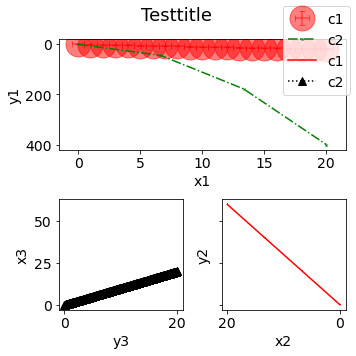

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.linspace(0,20,21)

#subplot1
xvals_sp1 = [xi,xi]
yvals_sp1 = [xi,xi**2]
colors_sp1 = ["r","g"]
markers_sp1 = [".","x"]
markersizes_sp1 = [50,2]
labels_sp1 = ["c1", "c2"]
linestyles_sp1 = ["","-."]
alphas_sp1 = [0.5,1]
smooths_sp1 = [False, True]
smoothdegrees_sp1 = [3,3]
smoothresolutions_sp1 = [100,4]
xerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
yerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
capsizes_sp1 = [3,5]
errcolors_sp1 = ["r","g"]
position_sp1 = 211
zorders_sp1 = [1,2]
invert_yaxis_sp1 = True
invert_xaxis_sp1 = False
xaxlab_sp1 = "x1"
yaxlab_sp1 = "y1"

#subplot2
xvals_sp2 = [xi]
yvals_sp2 = [xi*3]
colors_sp2 = ["r"]
markers_sp2 = [","]
markersizes_sp2 = [12]
labels_sp2 = ["c1"]
linestyles_sp2 = ["-"]
alphas_sp2 = [1]
smooths_sp2 = [True]
smoothdegrees_sp2 = [3]
smoothresolutions_sp2 = [4]
xerrs_sp2 = [[2]*len(xi)]
yerrs_sp2 = [[2]*len(xi)]
capsizes_sp2 = [3]
errcolors_sp2 = ["b"]
position_sp2 = 224
zorders_sp2 = [1]
invert_yaxis_sp2 = False
invert_xaxis_sp2 = True
xaxlab_sp2 = "x2"
yaxlab_sp2 = "y2"

#subplot3
xvals_sp3 = [xi]
yvals_sp3 = [xi]
colors_sp3 = ["k"]
markers_sp3 = ["^"]
markersizes_sp3 = [8]
labels_sp3 = ["c2"]
linestyles_sp3 = [":"]
alphas_sp3 = [1]
smooths_sp3 = [True]
smoothdegrees_sp3 = [2]
smoothresolutions_sp3 = [300]
xerrs_sp3 = [None]
yerrs_sp3 = [None]
capsizes_sp3 = [None]
errcolors_sp3 = ["c"]
position_sp3 = 223
zorders_sp3 = [1]
invert_yaxis_sp3 = False
invert_xaxis_sp3 = False
xaxlab_sp3 = "y3"
yaxlab_sp3 = "x3"

#define variables for each subplot/graph
xvals = [xvals_sp1, xvals_sp2, xvals_sp3]
yvals = [yvals_sp1, yvals_sp2, yvals_sp3]
colors= [colors_sp1, colors_sp2, colors_sp3]
markers = [markers_sp1, markers_sp2, markers_sp3]
markersizes = [markersizes_sp1, markersizes_sp2, markersizes_sp3]
labels = [labels_sp1, labels_sp2, labels_sp3] 
linestyles = [linestyles_sp1, linestyles_sp2, linestyles_sp3] 
alphas = [alphas_sp1, alphas_sp2, alphas_sp3] 
smooths = [smooths_sp1, smooths_sp2, smooths_sp3] 
smoothdegrees = [smoothdegrees_sp1, smoothdegrees_sp2, smoothdegrees_sp3] 
smoothresolutions = [smoothresolutions_sp1, smoothresolutions_sp2, smoothresolutions_sp3] 
xerrs = [xerrs_sp1, xerrs_sp2, xerrs_sp3] 
yerrs = [yerrs_sp1, yerrs_sp2, yerrs_sp3] 
capsizes = [capsizes_sp1, capsizes_sp2, capsizes_sp3] 
errcolors = [errcolors_sp1, errcolors_sp2, errcolors_sp3] 
positions = [position_sp1, position_sp2, position_sp3]
zorders = [zorders_sp1, zorders_sp2, zorders_sp3] 
invert_xaxis = [invert_xaxis_sp1, invert_xaxis_sp2, invert_xaxis_sp3]
invert_yaxis = [invert_yaxis_sp1, invert_yaxis_sp2, invert_yaxis_sp3]
xaxlabs = [xaxlab_sp1, xaxlab_sp2, xaxlab_sp3] 
yaxlabs = [yaxlab_sp1, yaxlab_sp2, yaxlab_sp3] 

suptitle="Testtitle"
num = "Testplot"

axlegend = False
figlegend = True
figsize = (5,5)
fontsize = 16

fig, axs = al.Plot_LuSt.plot_ax(xvals=xvals, yvals=yvals,
                                colors=colors, markers=markers, markersizes=markersizes, labels=labels, linestyles=linestyles, alphas=alphas,
                                smooths=smooths, smoothdegrees=smoothdegrees, smoothresolutions=smoothresolutions,
                                xerrs=xerrs, yerrs=yerrs, capsizes=capsizes, errcolors=errcolors,
                                positions=positions, zorders=zorders,
                                invert_yaxis=invert_yaxis, invert_xaxis=invert_xaxis,
                                xlabs=xaxlabs, ylabs=yaxlabs, suptitle=suptitle, num=num,
                                axlegend=axlegend, figlegend=figlegend, figsize=figsize, fontsize=fontsize,
                                timeit=True, verbose=True)


#use to share axis
axs[1].get_shared_y_axes().join(axs[1],axs[2])
axs[1].set_yticklabels([])
plt.tight_layout()
plt.show()


### __hexcolor_extract()__
- a function that creates a dictionary of hex-codes for colors in more or less spectral order
- especially useful, for not choosing the same color twice in one plot
- depends on *./files/colorcodes.txt*

--> Started hexcolor_extract at time 2021-11-04 12:16:54.088081


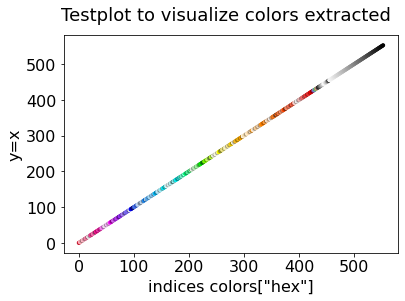

--> Time needed for hexcolor_extract: 0:00:00.215999
--> Finished hexcolor_extract at time 2021-11-04 12:16:54.304080


In [11]:
colors = al.Plot_LuSt.hexcolor_extract(testplot=True, timeit=True)

### __wavelength2rgb()__
- function to convert a wavelength to its corresponding RGB-value

In [12]:
lbda = 450 #nm
RGB = al.Plot_LuSt.wavelength2rgb(lbda)
print(RGB)

[  0  70 255]


### __color_generator()__
- a function to create a defined number of as different colors as possible
- returns a list of the respective RGB-values

--> Started color_generator at time 2021-11-04 12:16:57.947094


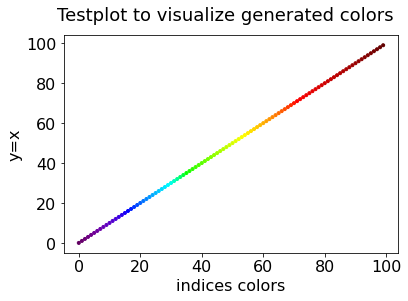

--> Time needed for color_generator: 0:00:00.167993
--> Finished color_generator at time 2021-11-04 12:16:58.115087


In [13]:
ncolors = 100
colors = al.Plot_LuSt.color_generator(ncolors, wavelength_range=[380,750], gamma=0.8, testplot=True, timeit=True)

## __Data_LuSt__

### __linspace_def()__
- function to create an array of datapoints spaced with some defined distribution
    - the distribution is a realized using superposition of gaussians
    - the gaussians are defined by the user through providing the respective centers and widths
    - the datapoints are returned for a range defined by the user
- has the option to prived a testplot for visualizing the created distribution

--> Started linspace_def at time 2021-11-04 12:17:02.980284

--------------------------------------------------
 verbose, linspace_def:
 --> Number of iterations         : 71
 --> Shape of combined_linspace   : 100
 --> Desired shape                : 100
 --> Range of linspace            : [-100, 100]
--> Number of cut datapoints: 1
--------------------------------------------------



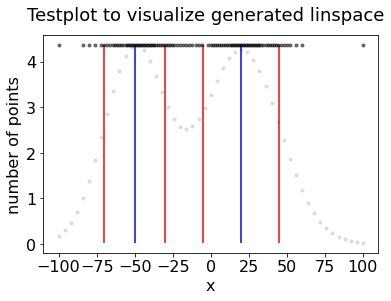

--> Time needed for linspace_def: 0:00:00.321000
--> Finished linspace_def at time 2021-11-04 12:17:03.301284


In [14]:
import numpy as np

input_array = np.linspace(-100,100,1000)
centers = [-50, 20]
widths = [20, 25]
nintervals=50
nbins=100
linspace = al.Data_LuSt.linspace_def(centers=centers, widths=widths, linspace_range=input_array, nintervals=nintervals, nbins=nbins, go_exact=True, testplot=True, verbose=True, timeit=True)


### __Example timeseries analysis__
Start by creating some periodic timeseries including noise.

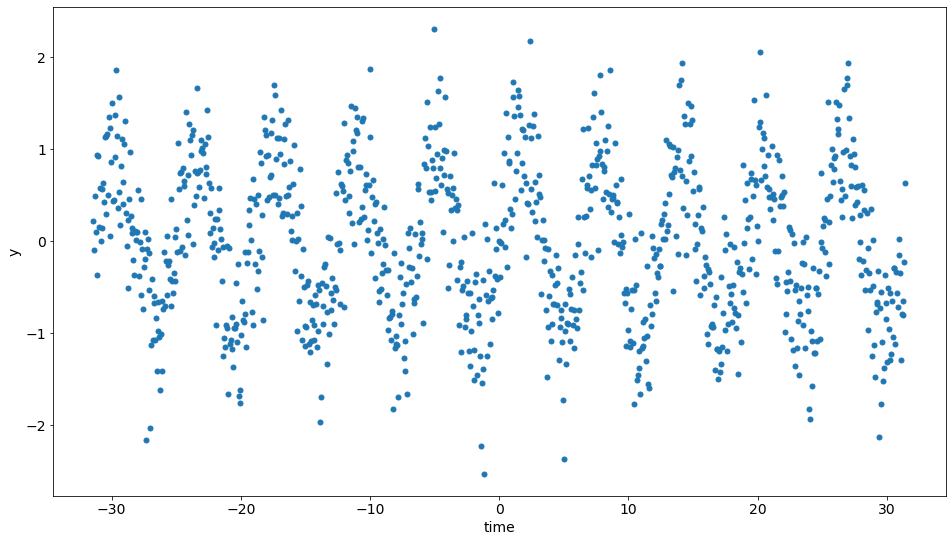

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astroLuSt as al

time = np.linspace(-10*np.pi, 10*np.pi, 1000)
noise = np.random.normal(size=time.shape)
fluxes = np.sin(time) + 0.5*noise

fig, axs = al.Plot_LuSt.plot_ax(xvals=[[time]], yvals=[[fluxes]], xlabs=["time"])
plt.show()

### __pdm()__
- function to execute a Phase Dispersion Minimization on a given timeseries.
- not only limited to lightcurve-anaylsis but any time series with periodic behaiviour actually
    - e.g.: radial velocity curves

--> Started pdm at time 2021-11-05 11:34:27.654325
No verbose impemented yet.


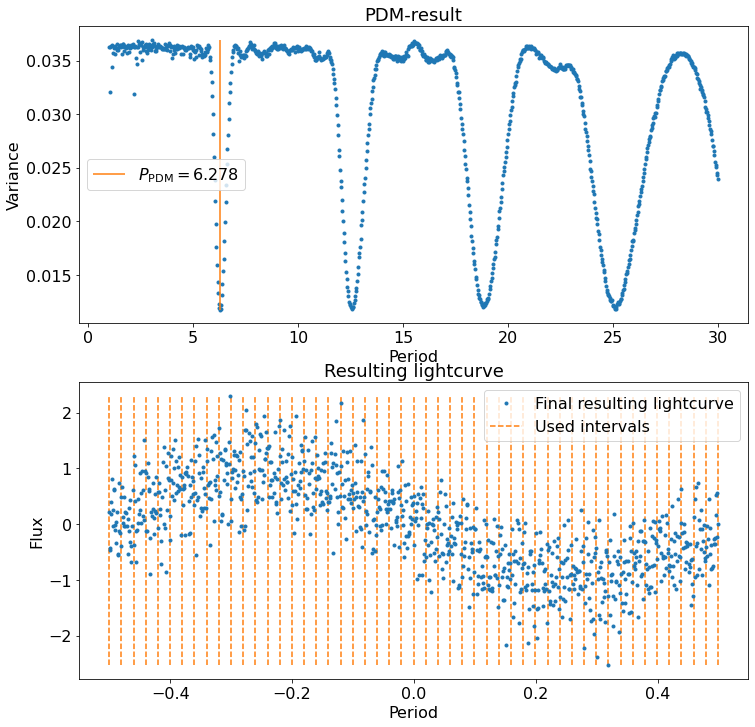

--> Time needed for pdm: 0:00:02.472221
--> Finished pdm at time 2021-11-05 11:34:30.126546


In [2]:
pdm_result = al.Data_LuSt.pdm(time, fluxes,
                              period_start=1, period_stop=30, nperiods=1000, nintervals=50,
                              normalize=True, testplot=True, verbose=True, timeit=True)
best_period, best_sigma2, periods_sorted, sigma2s_sorted, best_fold = pdm_result

### __fold()__

- function to fold a timeseries on a provided period
- returns the timeseries in phase space
    - from -0.5 to 0.5
- can in theory also be used to convert an array of times to its phase equivalent

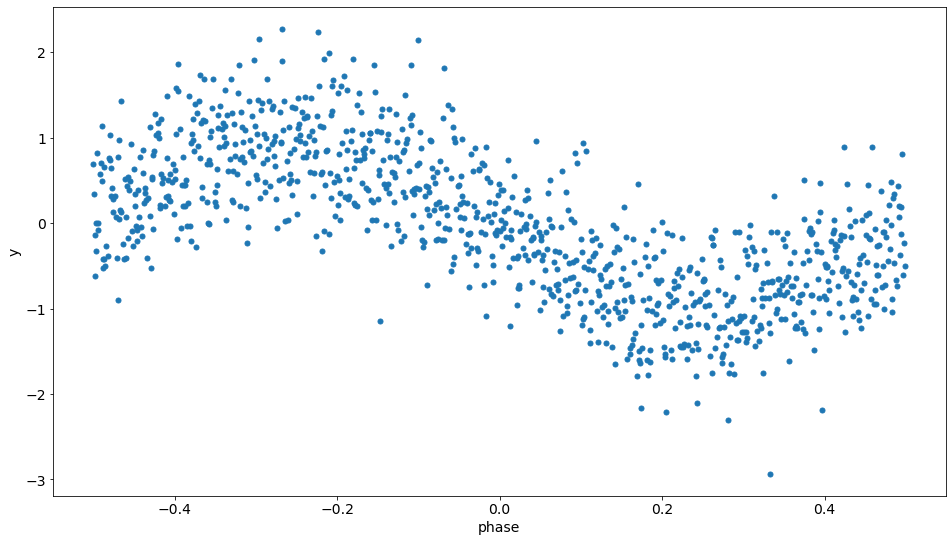

In [4]:
phases = al.Data_LuSt.fold(time, best_period)

fig, axs = al.Plot_LuSt.plot_ax(xvals=[[phases]], yvals=[[fluxes]], xlabs=["phase"])
plt.show()

### __periodic_shift()__
- function to shift a dataseries by shift considering periodic boundaries

--> Started periodic_shift at time 2021-11-04 12:17:08.783481
--> Time needed for periodic_shift: 0:00:00.000968
--> Finished periodic_shift at time 2021-11-04 12:17:08.784449


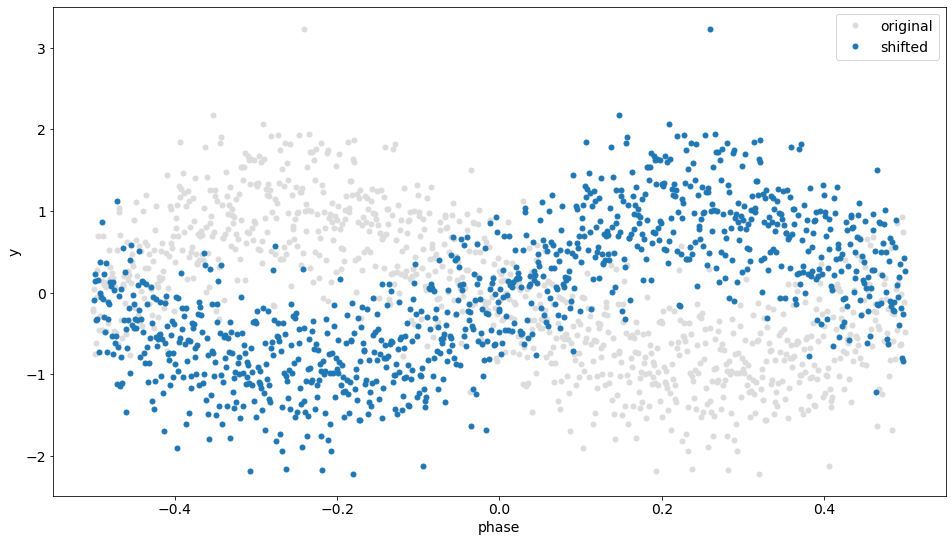

In [17]:
import numpy as np

input_array = phases
shift = 0.5
borders = [-0.5, 0.5]
shifted = al.Data_LuSt.periodic_shift(input_array, shift, borders, timeit=True, testplot=False, verbose=False)
fig, axs = al.Plot_LuSt.plot_ax([[phases, shifted]], [[fluxes, fluxes]], colors=[["gainsboro", "tab:blue"]], labels=[["original", "shifted"]], xlabs=["phase"], axlegend=True)

### __phase2time()__
- function to convert a given array of phases into its corresponding time equivalent

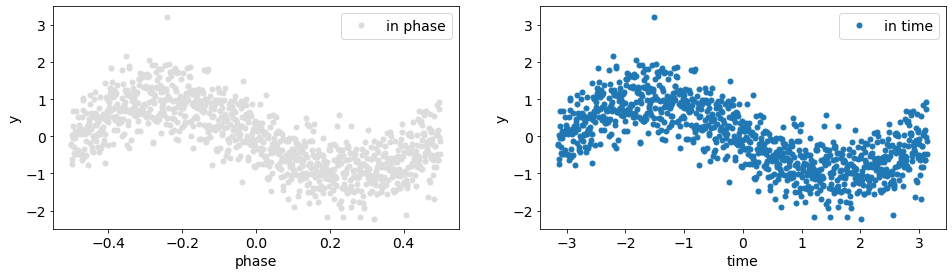

In [18]:
times = al.Data_LuSt.phase2time(phases, period=period)

fig, axs = al.Plot_LuSt.plot_ax([[phases], [times]], [[fluxes], [fluxes]], colors=[["gainsboro"], ["tab:blue"]], labels=[["in phase"], ["in time"]], xlabs=["phase", "time"], axlegend=True)

### __phase_binning()__
- function to execute binning in phase on some dataseries
- allows for definition of high-resolution areas by using linspace_def

--> Started phase_binning at time 2021-11-04 12:17:12.019963

--------------------------------------------------
 verbose, linspace_def:
 --> Number of iterations         : 39
 --> Shape of combined_linspace   : 51
 --> Desired shape                : 51
 --> Range of linspace            : [-0.5, 0.498999]
--> Number of cut datapoints: 1
--------------------------------------------------


--------------------------------------------------
 verbose, phase_binning: 
 --> requested shape            : 50
 --> shape of binned phases     : 50
 --> shape of binned fluxes     : 50
 --> shape of binned flux errors: 50
 --> shape of intervals used    : 51
 --------------------------------------------------

--> Time needed for phase_binning: 0:00:00.061999
--> Finished phase_binning at time 2021-11-04 12:17:12.081962


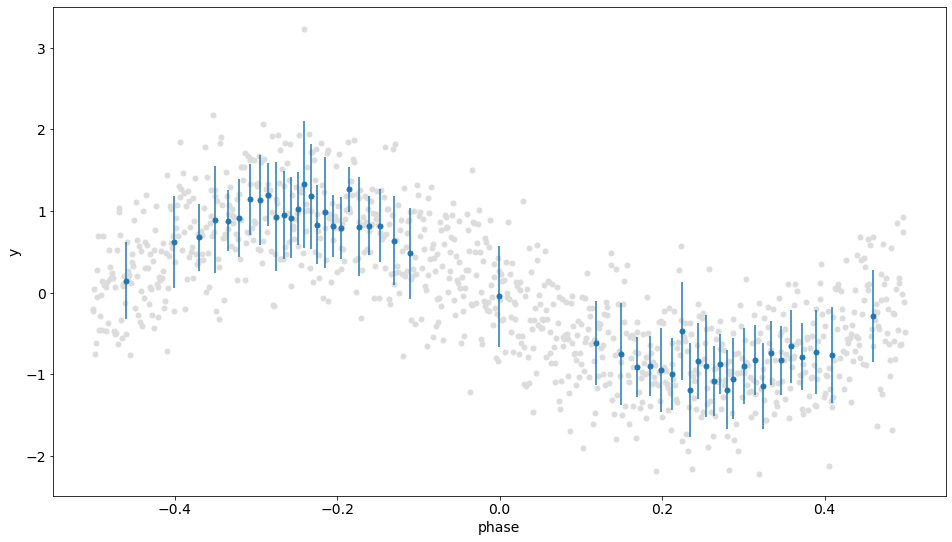

In [19]:
nintervals = 25
nbins = 50
centers = [-0.25, 0.25]
widths = [0.1, 0.1]
phases_mean, fluxes_mean, fluxes_sigm, intervals = al.Data_LuSt.phase_binning(fluxes=fluxes, phases=phases, nbins=nbins, nintervals=nintervals, centers=centers, widths=widths,
                                                                              go_exact=True, verbose=True, testplot=False, timeit=True)

fig, axs = al.Plot_LuSt.plot_ax([[phases, phases_mean]], [[fluxes, fluxes_mean]], yerrs=[[None, fluxes_sigm]],
                     colors=[["gainsboro", "tab:blue"]], zorders=[[1,3]],
                     xlabs=["phase"])

### __sigma_clipping()__
- function to execute sigma-clipping on some dataseries
- one needs to provide the intervals to consider and the reference_phases

--> Started sigma_clipping at time 2021-11-04 12:17:13.884585
--> Time needed for sigma_clipping: 0:00:00.012002
--> Finished sigma_clipping at time 2021-11-04 12:17:13.896587


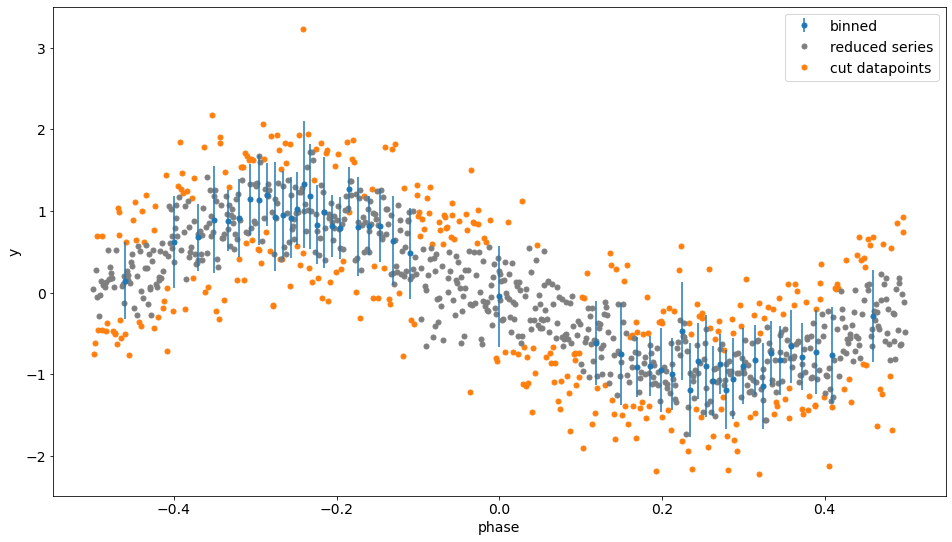

In [20]:
clip_value_top = 1*fluxes_sigm
clip_value_bottom = 1*fluxes_sigm

y_sigcut, phases_sigcut, times_sigcut, cut_y, cut_p, cut_t = al.Data_LuSt.sigma_clipping(fluxes=fluxes, fluxes_mean=fluxes_mean, phases=phases, phases_mean=phases_mean,
                                                                                              intervals=intervals, clip_value_top=clip_value_top, clip_value_bottom=clip_value_bottom, times=time, timeit=True)

fig, axs = al.Plot_LuSt.plot_ax(xvals=[[phases_mean, phases_sigcut, cut_p]], yvals=[[fluxes_mean, y_sigcut, cut_y]],
                                yerrs=[[fluxes_sigm, None, None]], errcolors=[["tab:blue", "tab:grey", "tab:orange"]],
                                colors=[["tab:blue", "tab:grey", "tab:orange"]],
                                labels=[["binned", "reduced series", "cut datapoints"]], axlegend=True,
                                xlabs=["phase"],
                                zorders=[[3,2,1]])

### __lc_error()__
- function to estimate the errors of a lightcurve given a time-difference condition
- useful for e.g. space photometry data
- works by basically clustering the dataseries
 

We start by simulating some data with periodic gaps in the measurements.

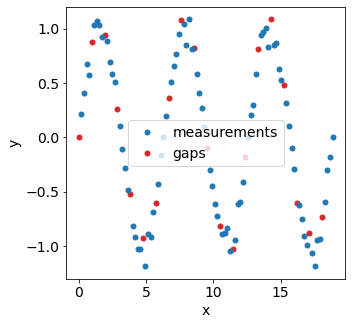

In [21]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,6*np.pi,100)
time_idx = np.arange(0, time.shape[0], 1)
time_bool = ((time_idx)%5 != 0)
noise = np.random.normal(loc=0, size=time.shape)
flux = np.sin(time)*(1 + 0.1*noise)


time_measurements = time[time_bool]
flux_measurements = flux[time_bool]
# flux_measurements = np.ones_like(time_measurements)


time_gaps = time[~time_bool]
flux_gaps = flux[~time_bool]
# flux_gaps = np.zeros_like(time_gaps)

fig, axs = al.Plot_LuSt.plot_ax([[time_measurements, time_gaps]], [[flux_measurements, flux_gaps]],
                                colors=[["tab:blue", "tab:red"]], zorders=[[2,1]],
                                labels=[["measurements", "gaps"]], axlegend=True,
                                figsize=(5,5))
plt.show()

--> Started lc_error at time 2021-11-04 12:17:17.154202


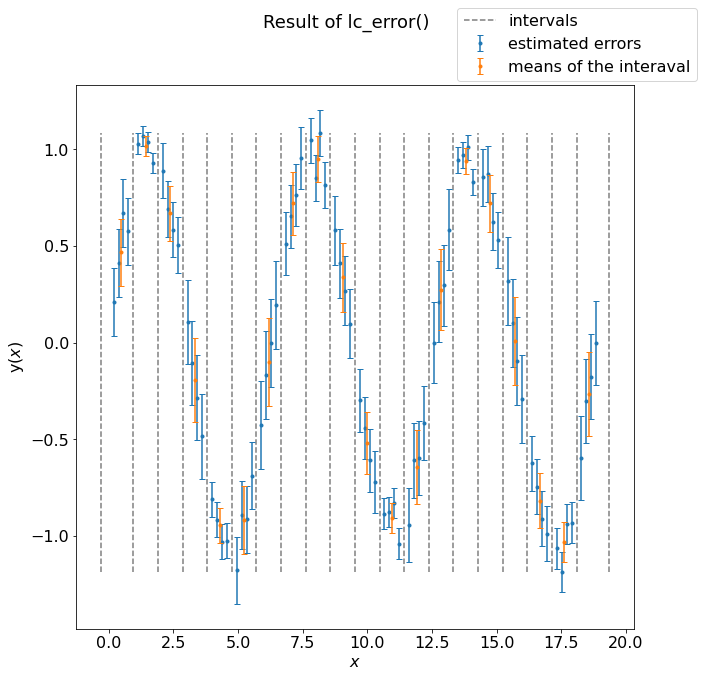

--> Time needed for lc_error: 0:00:00.708037
--> Finished lc_error at time 2021-11-04 12:17:17.862239


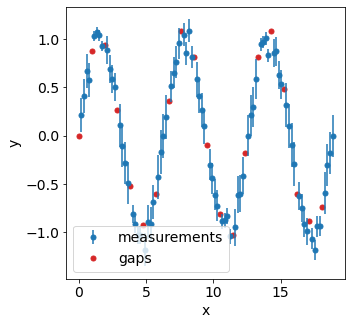

In [22]:
delta_t_points = np.round(np.max(np.diff(time_measurements)), decimals=2)

errs, mean_fluxes, mean_times, sigmas, intervals = al.Data_LuSt.lc_error(fluxes=flux_measurements, times=time_measurements, delta_t_points=delta_t_points, timeit=True, verbose=True)

fig, axs = al.Plot_LuSt.plot_ax([[time_measurements, time_gaps]], [[flux_measurements, flux_gaps]],
                                yerrs=[[errs, None]],
                                colors=[["tab:blue", "tab:red"]], zorders=[[2,1]],
                                labels=[["measurements", "gaps"]], axlegend=True, figsize=(5,5))
plt.show()